# data preparation


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

df=pd.read_csv("totalconsmp.csv",header=0,infer_datetime_format=True,parse_dates=['occurtime'],index_col=['occurtime'])


In [8]:
df.head()

,power
occurtime,
2020-12-10 00:00:00,0.00
2020-12-10 00:05:00,130.16
2020-12-10 00:10:00,124.64
2020-12-10 00:15:00,121.36
2020-12-10 00:20:00,120.16


In [9]:
df.tail()

,power
occurtime,
2021-02-18 11:30:00,13.68
2021-02-18 11:40:00,0.28
2021-02-18 11:45:00,0.27
2021-02-18 11:50:00,0.00
2021-02-18 11:55:00,0.00


In [10]:
df.index

DatetimeIndex(['2020-12-10 00:00:00', '2020-12-10 00:05:00',
               '2020-12-10 00:10:00', '2020-12-10 00:15:00',
               '2020-12-10 00:20:00', '2020-12-10 00:25:00',
               '2020-12-10 00:30:00', '2020-12-10 00:35:00',
               '2020-12-10 00:40:00', '2020-12-10 00:45:00',
               ...
               '2021-02-18 11:05:00', '2021-02-18 11:10:00',
               '2021-02-18 11:15:00', '2021-02-18 11:20:00',
               '2021-02-18 11:25:00', '2021-02-18 11:30:00',
               '2021-02-18 11:40:00', '2021-02-18 11:45:00',
               '2021-02-18 11:50:00', '2021-02-18 11:55:00'],
              dtype='datetime64[ns]', name='occurtime', length=19681, freq=None)

In [ ]:

#df=df.iloc[192:]
#df.head(288)
#df.tail()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19681 entries, 2020-12-10 00:00:00 to 2021-02-18 11:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   19681 non-null  float64
dtypes: float64(1)
memory usage: 307.5 KB


In [13]:
#resample time to days
daily_data=df.resample('D').sum()

In [ ]:
#df['occurtime'] = pd.to_datetime(df['occurtime'],format="%Y-%m-%d_%H:%M:%S")



#df.to_csv('totalconsmp.csv',index=False,date_format="%Y-%m-%d %H:%M:%S")

In [14]:
daily_data.head()

,power
occurtime,
2020-12-10,21980.39
2020-12-11,16564.25
2020-12-12,20359.33
2020-12-13,21630.15
2020-12-14,22984.32


In [15]:
daily_data.describe()

,power
count,71.000000
mean,19206.970141
std,7950.674991
min,0.000000
25%,16912.785000
50%,20717.400000
75%,21960.895000
max,55357.790000


In [16]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2020-12-10 to 2021-02-18
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   71 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


## Step 2: Visualize the Data

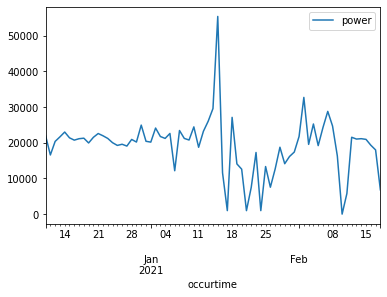

In [17]:
daily_data.plot()

In [ ]:
### Testing For Stationarity



In [18]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(daily_data['power'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [20]:
adfuller_test(daily_data['power'])

ADF Test Statistic : -3.03495791637911
p-value : 0.03175624149284788
#Lags Used : 5
Number of Observations Used : 65
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [21]:
daily_data['power First Difference'] = daily_data['power'] - daily_data['power'].shift(1)

In [22]:
daily_data['power'].shift(1)

occurtime
2020-12-10         NaN
2020-12-11    21980.39
2020-12-12    16564.25
2020-12-13    20359.33
2020-12-14    21630.15
                ...   
2021-02-14    21021.60
2021-02-15    21124.72
2021-02-16    20928.51
2021-02-17    19299.25
2021-02-18    17978.39
Freq: D, Name: power, Length: 71, dtype: float64

In [ ]:
#daily_data['Seasonal First Difference']=daily_data['power']-daily_data['power'].shift(12)

In [23]:
daily_data.head(14)

,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17
2020-12-15,21369.12,-1615.20
2020-12-16,20717.40,-651.72
2020-12-17,21118.59,401.19
2020-12-18,21263.60,145.01


In [24]:
## Again test dickey fuller test
adfuller_test(daily_data['power First Difference'].dropna())

ADF Test Statistic : -4.625220682389512
p-value : 0.0001160274838026096
#Lags Used : 5
Number of Observations Used : 64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


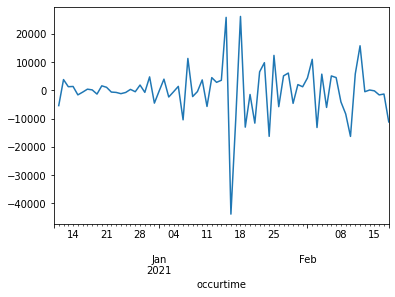

In [35]:
daily_data['power First Difference']=daily_data['power First Difference'].dropna()
daily_data['power First Difference'].plot()

In [2]:
!pip install pmdarima
from pmdarima import auto_arima

     |████████████████████████████████| 1.5MB 8.9MB/s 
     |████████████████████████████████| 9.5MB 10.7MB/s 
     |████████████████████████████████| 2.1MB 43.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
stepwise_fit=auto_arima(daily_data['power First Difference'].dropna(),trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1481.408, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1475.830, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1464.174, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1479.446, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1460.735, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1460.127, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1461.612, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1466.009, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1465.142, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1458.022, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1456.139, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=1456.1

In [28]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -720.351
Date:                Sat, 27 Mar 2021   AIC                           1454.701
Time:                        19:23:56   BIC                           1470.440
Sample:                             0   HQIC                          1460.953
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1206      0.249     -4.497      0.000      -1.609      -0.632
ar.L2         -0.2522      0.250     -1.011      0.312      -0.741       0.237
ar.L3          0.3520      0.150      2.344      0.019       0.058       0.646
ma.L1          0.6709      0.261      2.571      0.010       0.159       1.182
ma.L2         -0.7282      0.197     -3.705      0.000      -1.114      -0.343
ma.L3         -0.8100      0.193     -4.194      0.000      -1.188      -0.431
sigma2      6.312e+07   1.24e-09   5.09e+16      0.000    6.31e+07    6.31e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                59.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.73   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+33. Standard errors may be unstable.
"""

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
train=daily_data.iloc[:45]
test=daily_data.iloc[45:]
print(train.shape,test.shape)

(45, 2) (26, 2)


In [45]:
daily_data.head()


,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17


In [46]:
daily_data=daily_data.iloc[1:]

In [47]:
daily_data.head()


,power,power First Difference
occurtime,,
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17
2020-12-15,21369.12,-1615.20


In [50]:
train=daily_data.iloc[:45]
test=daily_data.iloc[45:]
print(train.shape,test.shape)

(45, 2) (25, 2)


In [51]:
model=ARIMA(train['power First Difference'].dropna(),order=(3,0,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                                
==================================================================================
Dep. Variable:     power First Difference   No. Observations:                   45
Model:                         ARMA(3, 3)   Log Likelihood                -463.012
Method:                           css-mle   S.D. of innovations           6464.355
Date:                    Sat, 27 Mar 2021   AIC                            942.025
Time:                            19:32:39   BIC                            956.478
Sample:                        12-11-2020   HQIC                           947.413
                             - 01-24-2021                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -139.5188    104.267     -1.338      0.181    -343.878      64.840
ar.L1.power First Difference    -1.3051      0.154     -8.487      0.000      -1.606      -1.004
ar.L2.power First Difference    -0.4950      0.243     -2.033      0.042      -0.972      -0.018
ar.L3.power First Difference     0.1839      0.171      1.073      0.283      -0.152       0.520
ma.L1.power First Difference     0.8670      0.191      4.545      0.000       0.493       1.241
ma.L2.power First Difference    -0.8674      0.181     -4.803      0.000      -1.221      -0.513
ma.L3.power First Difference    -0.9996      0.197     -5.061      0.000      -1.387      -0.612
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9169           -0.6008j            1.0962           -0.4077
AR.2           -0.9169           +0.6008j            1.0962            0.4077
AR.3            4.5250           -0.0000j            4.5250           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.9339           -0.3582j            1.0002           -0.4417
MA.3           -0.9339           +0.3582j            1.0002            0.4417
-----------------------------------------------------------------------------
"""

In [52]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2021-01-25    19010.984346
2021-01-26    -3425.214581
2021-01-27    -3556.742039
2021-01-28     9468.571598
2021-01-29   -11591.511098
2021-01-30     9421.802205
2021-01-31    -5182.123868
2021-02-01     -397.401281
2021-02-02     4451.456312
2021-02-03    -6930.784762
2021-02-04     6403.657719
2021-02-05    -4472.918531
2021-02-06     1028.119798
2021-02-07     1684.945684
2021-02-08    -3895.481777
2021-02-09     4073.926034
2021-02-10    -3443.673066
2021-02-11     1396.283827
2021-02-12      266.548232
2021-02-13    -2037.324833
2021-02-14     2418.697923
2021-02-15    -2464.102027
2021-02-16     1278.920238
2021-02-17     -369.567502
2021-02-18     -968.905738
Freq: D, dtype: float64


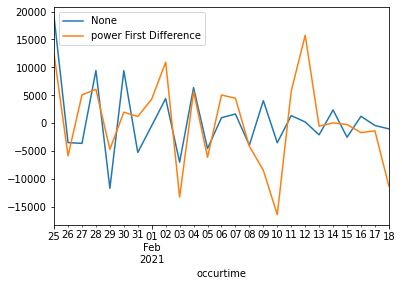

In [55]:
pred.plot(legend=True)
test['power First Difference'].plot(legend=True)

In [57]:
test['power First Difference'].mean()

232.57879999999975

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['power First Difference']))
print(rmse)

6686.554364310724


In [63]:
#when i use daily_data['power first difference] it causes an error,, so am i supposed to use 'power' or 'power first difference'!
model2=ARIMA(daily_data['power'],order=(3,0,3))
model2=model2.fit()
daily_data.tail()

,power,power First Difference
occurtime,,
2021-02-14,21124.72,103.12
2021-02-15,20928.51,-196.21
2021-02-16,19299.25,-1629.26
2021-02-17,17978.39,-1320.86
2021-02-18,6791.59,-11186.80


In [66]:
index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
pred=model2.predict(start=len(daily_data),end=len(daily_data)+10,typ='levels').rename('arima preds')
pred.index=index_future_dates
print(pred)

2021-02-18    19058.900671
2021-02-19    22747.421367
2021-02-20    15188.719604
2021-02-21    14065.399328
2021-02-22    13830.100708
2021-02-23    16092.177602
2021-02-24    18857.715564
2021-02-25    21224.313151
2021-02-26    22307.790635
2021-02-27    22004.034007
2021-02-28    20703.911502
Freq: D, Name: arima preds, dtype: float64


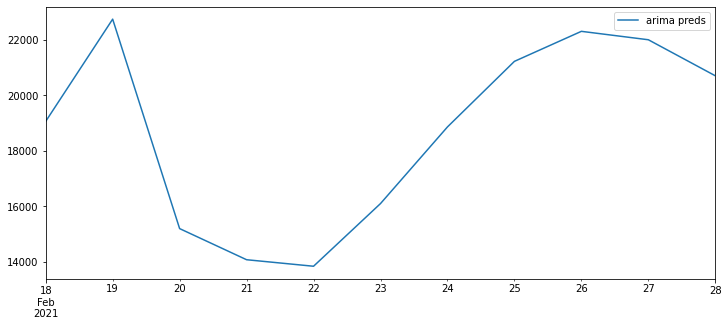

In [65]:
pred.plot(figsize=(12,5),legend=True)